In [1]:
import pandas as pd 
import numpy as np 
import time
from joblib import Parallel,delayed

In [2]:
train_data = pd.read_excel('C:/Users/Srujan/Documents/Datasets/flight_price/Data_Train.xlsx',parse_dates=['Date_of_Journey'])
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
train_data.info()
#no null values and all independent features are are object type and dependent feature is integer type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


In [4]:
train_data['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [5]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [6]:
train_data['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [7]:
train_data['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [6]:
train_data = train_data[(train_data.Airline != 'Jet Airways') & (train_data.Airline != 'Jet Airways Business')]
train_data.reset_index(drop=True,inplace=True)

In [7]:
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
3,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
4,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
...,...,...,...,...,...,...,...,...,...,...,...
6823,SpiceJet,2019-05-21,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257
6824,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
6825,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
6826,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [8]:
# Droppin Route and Additional info columns
train_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Departure time and Arrival time are strings. We need to extract hour and minute from both the columns

In [9]:

# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)


train_data["Dep_hour"] = train_data["Dep_hour"].astype(np.int16)
train_data["Dep_min"] = train_data["Dep_min"].astype(np.int16)

C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [10]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)


train_data["Arrival_hour"] = train_data["Arrival_hour"].astype(np.int16)
train_data["Arrival_min"] = train_data["Arrival_min"].astype(np.int16)

C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

Extracting journey date, journey month and journey day(day of the week) from Date_of_Journey column and dropping that column after extracting.

In [11]:
train_data['Jounrey_date'] = train_data['Date_of_Journey'].dt.day
train_data['Jounrey_month'] = train_data['Date_of_Journey'].dt.month
train_data['Journey_day'] = train_data['Date_of_Journey'].dt.dayofweek
train_data.drop('Date_of_Journey',axis=1,inplace=True)
train_data

C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,Airline,Source,Destination,Duration,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Jounrey_date,Jounrey_month,Journey_day
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,22,20,1,10,24,3,6
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,50,13,15,5,1,5
2,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,18,5,23,30,5,12,3
3,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,16,50,21,35,3,1,3
4,SpiceJet,Kolkata,Banglore,2h 25m,non-stop,3873,9,0,11,25,24,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6823,SpiceJet,Banglore,Delhi,2h 40m,non-stop,3257,5,55,8,35,21,5,1
6824,Air Asia,Kolkata,Banglore,2h 30m,non-stop,4107,19,55,22,25,4,9,2
6825,Air India,Kolkata,Banglore,2h 35m,non-stop,4145,20,45,23,20,27,4,5
6826,Vistara,Banglore,New Delhi,2h 40m,non-stop,12648,11,30,14,10,3,1,3


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6828 entries, 0 to 6827
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Airline        6828 non-null   object
 1   Source         6828 non-null   object
 2   Destination    6828 non-null   object
 3   Duration       6828 non-null   object
 4   Total_Stops    6827 non-null   object
 5   Price          6828 non-null   int64 
 6   Dep_hour       6828 non-null   int16 
 7   Dep_min        6828 non-null   int16 
 8   Arrival_hour   6828 non-null   int16 
 9   Arrival_min    6828 non-null   int16 
 10  Jounrey_date   6828 non-null   int64 
 11  Jounrey_month  6828 non-null   int64 
 12  Journey_day    6828 non-null   int64 
dtypes: int16(4), int64(4), object(5)
memory usage: 533.6+ KB


In [13]:
train_data['Total_Stops'] = train_data['Total_Stops'].fillna(train_data['Total_Stops'].mode()[0])

C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Creating a new duration column. Even tough duration column is available, it is a string. We will find an easy way to extract the duration from departure time and arrival time.

Running a for loop normally took around 5 seconds for this task so using joblib for multiprocessing which completes the work in less than 1 second.

In [14]:
def create_duration_time(dep_hr,arr_hr,dep_min,arr_min):
    
    if dep_hr>arr_hr:
        
        hours = arr_hr + 24 - dep_hr
        
    else:
        hours = arr_hr - dep_hr

    minutes = arr_min - dep_min
 
    duration = hours * 60 + minutes
    return duration

start = time.time()

duration = Parallel(n_jobs=4)(delayed(create_duration_time)(dh,ah,dm,am) for dh,ah,dm,am in zip(train_data['Dep_hour'],\
                                                                                           train_data['Arrival_hour'],\
                                                                                           train_data['Dep_min'],\
                                                                                           train_data['Arrival_min']))

end=time.time()
print(end-start)

1.9260756969451904


In [15]:
train_data.loc[:,'Duration'] = duration

C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [16]:
train_data['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
train_data

C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Airline,Source,Destination,Duration,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Jounrey_date,Jounrey_month,Journey_day
0,IndiGo,Banglore,New Delhi,170,0,3897,22,20,1,10,24,3,6
1,Air India,Kolkata,Banglore,445,2,7662,5,50,13,15,5,1,5
2,IndiGo,Kolkata,Banglore,325,1,6218,18,5,23,30,5,12,3
3,IndiGo,Banglore,New Delhi,285,1,13302,16,50,21,35,3,1,3
4,SpiceJet,Kolkata,Banglore,145,0,3873,9,0,11,25,24,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6823,SpiceJet,Banglore,Delhi,160,0,3257,5,55,8,35,21,5,1
6824,Air Asia,Kolkata,Banglore,150,0,4107,19,55,22,25,4,9,2
6825,Air India,Kolkata,Banglore,155,0,4145,20,45,23,20,27,4,5
6826,Vistara,Banglore,New Delhi,160,0,12648,11,30,14,10,3,1,3


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

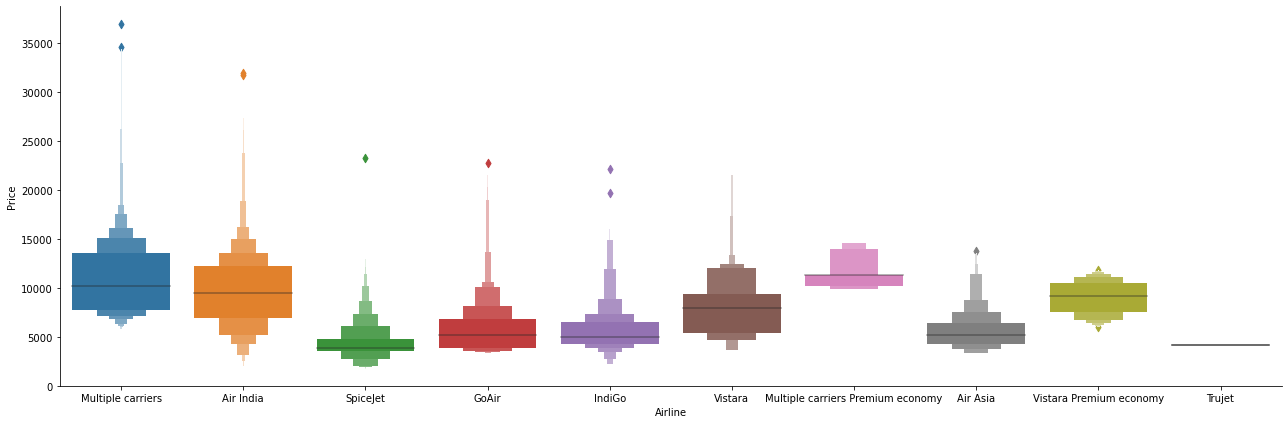

In [18]:

# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)

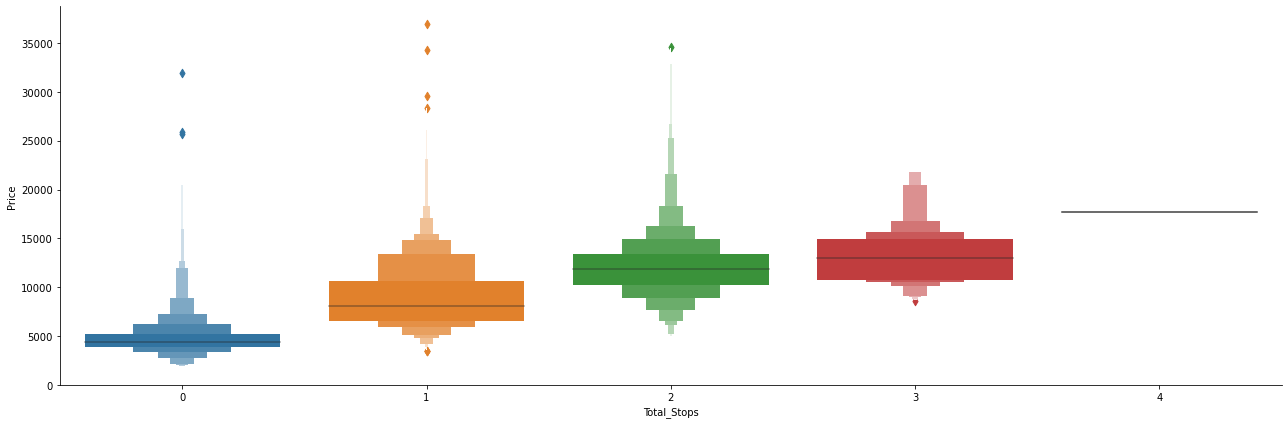

In [19]:
# Airline vs Price
sns.catplot(y = "Price", x = "Total_Stops", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)

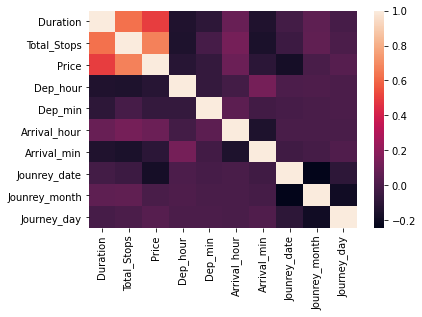

In [20]:
sns.heatmap(train_data.corr())

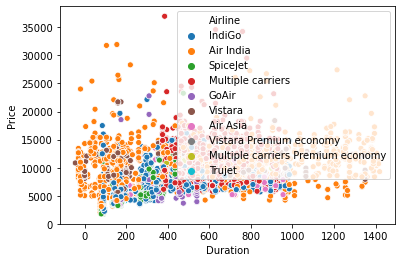

In [21]:
sns.scatterplot(x='Duration',y='Price',data=train_data,hue='Airline')

## Feature Selection

In [22]:
X=train_data.copy()
y=X['Price']
X = X.iloc[:,3:]
X.drop(['Price'],axis=1,inplace=True)
X.head()

,Duration,Total_Stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Jounrey_date,Jounrey_month,Journey_day
0,170,0,22,20,1,10,24,3,6
1,445,2,5,50,13,15,5,1,5
2,325,1,18,5,23,30,5,12,3
3,285,1,16,50,21,35,3,1,3
4,145,0,9,0,11,25,24,6,0


In [23]:
X.isnull().any()

Duration         False
Total_Stops      False
Dep_hour         False
Dep_min          False
Arrival_hour     False
Arrival_min      False
Jounrey_date     False
Jounrey_month    False
Journey_day      False
dtype: bool

In [24]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

In [25]:
model_dt = DecisionTreeRegressor()
rfe = RFE(estimator=model_dt, n_features_to_select=1, step=1)
rfe.fit(X,y)

RFE(estimator=DecisionTreeRegressor(), n_features_to_select=1)

In [26]:
rfe.ranking_

array([2, 1, 6, 5, 4, 8, 3, 7, 9])

In [27]:
X.columns

Index(['Duration', 'Total_Stops', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Jounrey_date', 'Jounrey_month', 'Journey_day'],
      dtype='object')

In [28]:
for rank, col in zip(rfe.ranking_,X.columns):
    print(rank, col)

2 Duration
1 Total_Stops
6 Dep_hour
5 Dep_min
4 Arrival_hour
8 Arrival_min
3 Jounrey_date
7 Jounrey_month
9 Journey_day


Seems like Journey_day is not that useful and its correlation with target is also not satisfying. So we will drop Journey_day

In [29]:
train_data.drop('Journey_day',axis=1,inplace=True)

C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [30]:
train_data

,Airline,Source,Destination,Duration,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Jounrey_date,Jounrey_month
0,IndiGo,Banglore,New Delhi,170,0,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,445,2,7662,5,50,13,15,5,1
2,IndiGo,Kolkata,Banglore,325,1,6218,18,5,23,30,5,12
3,IndiGo,Banglore,New Delhi,285,1,13302,16,50,21,35,3,1
4,SpiceJet,Kolkata,Banglore,145,0,3873,9,0,11,25,24,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6823,SpiceJet,Banglore,Delhi,160,0,3257,5,55,8,35,21,5
6824,Air Asia,Kolkata,Banglore,150,0,4107,19,55,22,25,4,9
6825,Air India,Kolkata,Banglore,155,0,4145,20,45,23,20,27,4
6826,Vistara,Banglore,New Delhi,160,0,12648,11,30,14,10,3,1


In [31]:
train_data = pd.get_dummies(train_data,drop_first=True)
train_data

,Duration,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Jounrey_date,Jounrey_month,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,3897,22,20,1,10,24,3,0,...,0,0,0,0,0,0,0,0,0,1
1,445,2,7662,5,50,13,15,5,1,1,...,0,0,0,1,0,0,0,0,0,0
2,325,1,6218,18,5,23,30,5,12,0,...,0,0,0,1,0,0,0,0,0,0
3,285,1,13302,16,50,21,35,3,1,0,...,0,0,0,0,0,0,0,0,0,1
4,145,0,3873,9,0,11,25,24,6,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6823,160,0,3257,5,55,8,35,21,5,0,...,0,0,0,0,0,0,1,0,0,0
6824,150,0,4107,19,55,22,25,4,9,0,...,0,0,0,1,0,0,0,0,0,0
6825,155,0,4145,20,45,23,20,27,4,1,...,0,0,0,1,0,0,0,0,0,0
6826,160,0,12648,11,30,14,10,3,1,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
train_data.to_csv('modified_dataset.csv')